# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data

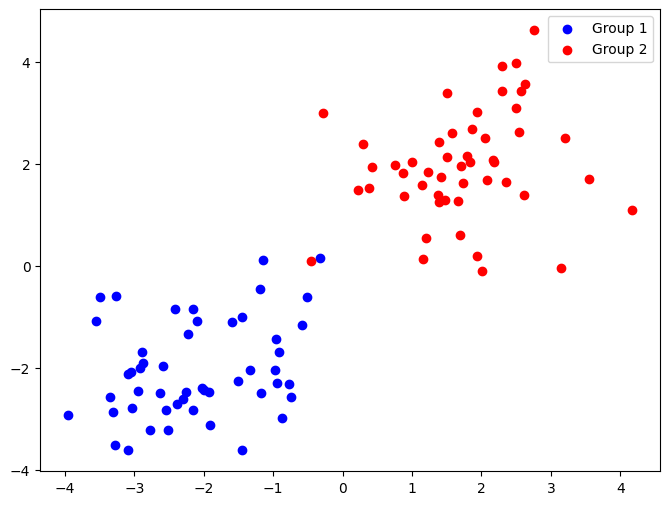

In [12]:
group1_x1 = np.random.normal(size=50, loc=-2)
group1_x2 = np.random.normal(size=50, loc=-2)

group2_x1 = np.random.normal(size=50, loc=2)
group2_x2 = np.random.normal(size=50, loc=2)

X = np.array([
    np.concatenate([group1_x1, group2_x1]),
    np.concatenate([group1_x2, group2_x2])
]).T
y = np.concatenate([np.zeros(50), np.ones(50)])

plt.figure(figsize=(8, 6))
plt.scatter(group1_x1, group1_x2, color="blue", label="Group 1")
plt.scatter(group2_x1, group2_x2, color="red", label="Group 2")
plt.legend()
plt.show()

# Model

Source:
- <a href="https://www.youtube.com/watch?v=T9UcK-TxQGw">AssemblyAI</a>

In [24]:
class SVM:
    def __init__(self, lr=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = lr
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        y_ = np.where(y <= 0, -1, 1)

        # init weights
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        y_pred = np.sign(approx)
        y_pred[y_pred == -1] = 0
        return y_pred

# Train

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = SVM()
svm.fit(X_train, y_train)

# Evaluation

In [26]:
from sklearn.metrics import accuracy_score

y_pred = svm.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc*100}%")

Accuracy: 100.0%


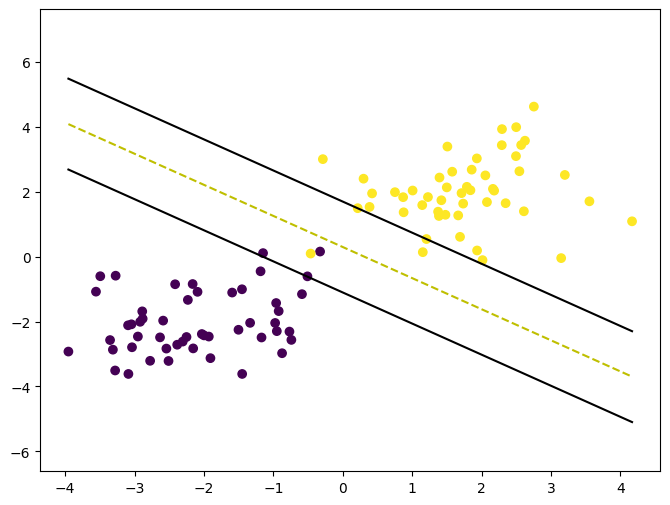

In [27]:
def visualize_svm():
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    x1_1 = get_hyperplane_value(x0_1, svm.w, svm.b, 0)
    x1_2 = get_hyperplane_value(x0_2, svm.w, svm.b, 0)

    x1_1_m = get_hyperplane_value(x0_1, svm.w, svm.b, -1)
    x1_2_m = get_hyperplane_value(x0_2, svm.w, svm.b, -1)

    x1_1_p = get_hyperplane_value(x0_1, svm.w, svm.b, 1)
    x1_2_p = get_hyperplane_value(x0_2, svm.w, svm.b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])

    plt.show()

visualize_svm()